In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy
from scipy.signal import find_peaks, hilbert

def oscillator(t, A, B, omega_plus, omega_minus, phi, d, C):
    return A*np.cos(omega_plus*(t-d)+phi) + B*np.cos(omega_minus*(t-d)+phi) + C

filenames = []
for i in range(1, 18):
    filename = "/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/Damp/ALL{:04d}".format(i) + ".CSV"
    filenames.append(filename)


for i, file1 in enumerate(filenames):
    data = np.genfromtxt(file1, skip_header=18, delimiter=',')
    data[:, 0] = data[:, 0] - data[:, 0][0]
    data[:, 1] = data[:, 1] / np.max(data[:, 1])
    data[:, 2] = data[:, 2] - data[:, 2][0]
    data[:, 3] = data[:, 3] / np.max(data[:, 3])
    np.savetxt('DLL{:04d}'.format(i+1) + '.CSV', data, delimiter=',')

[1.20112795 0.04169703]


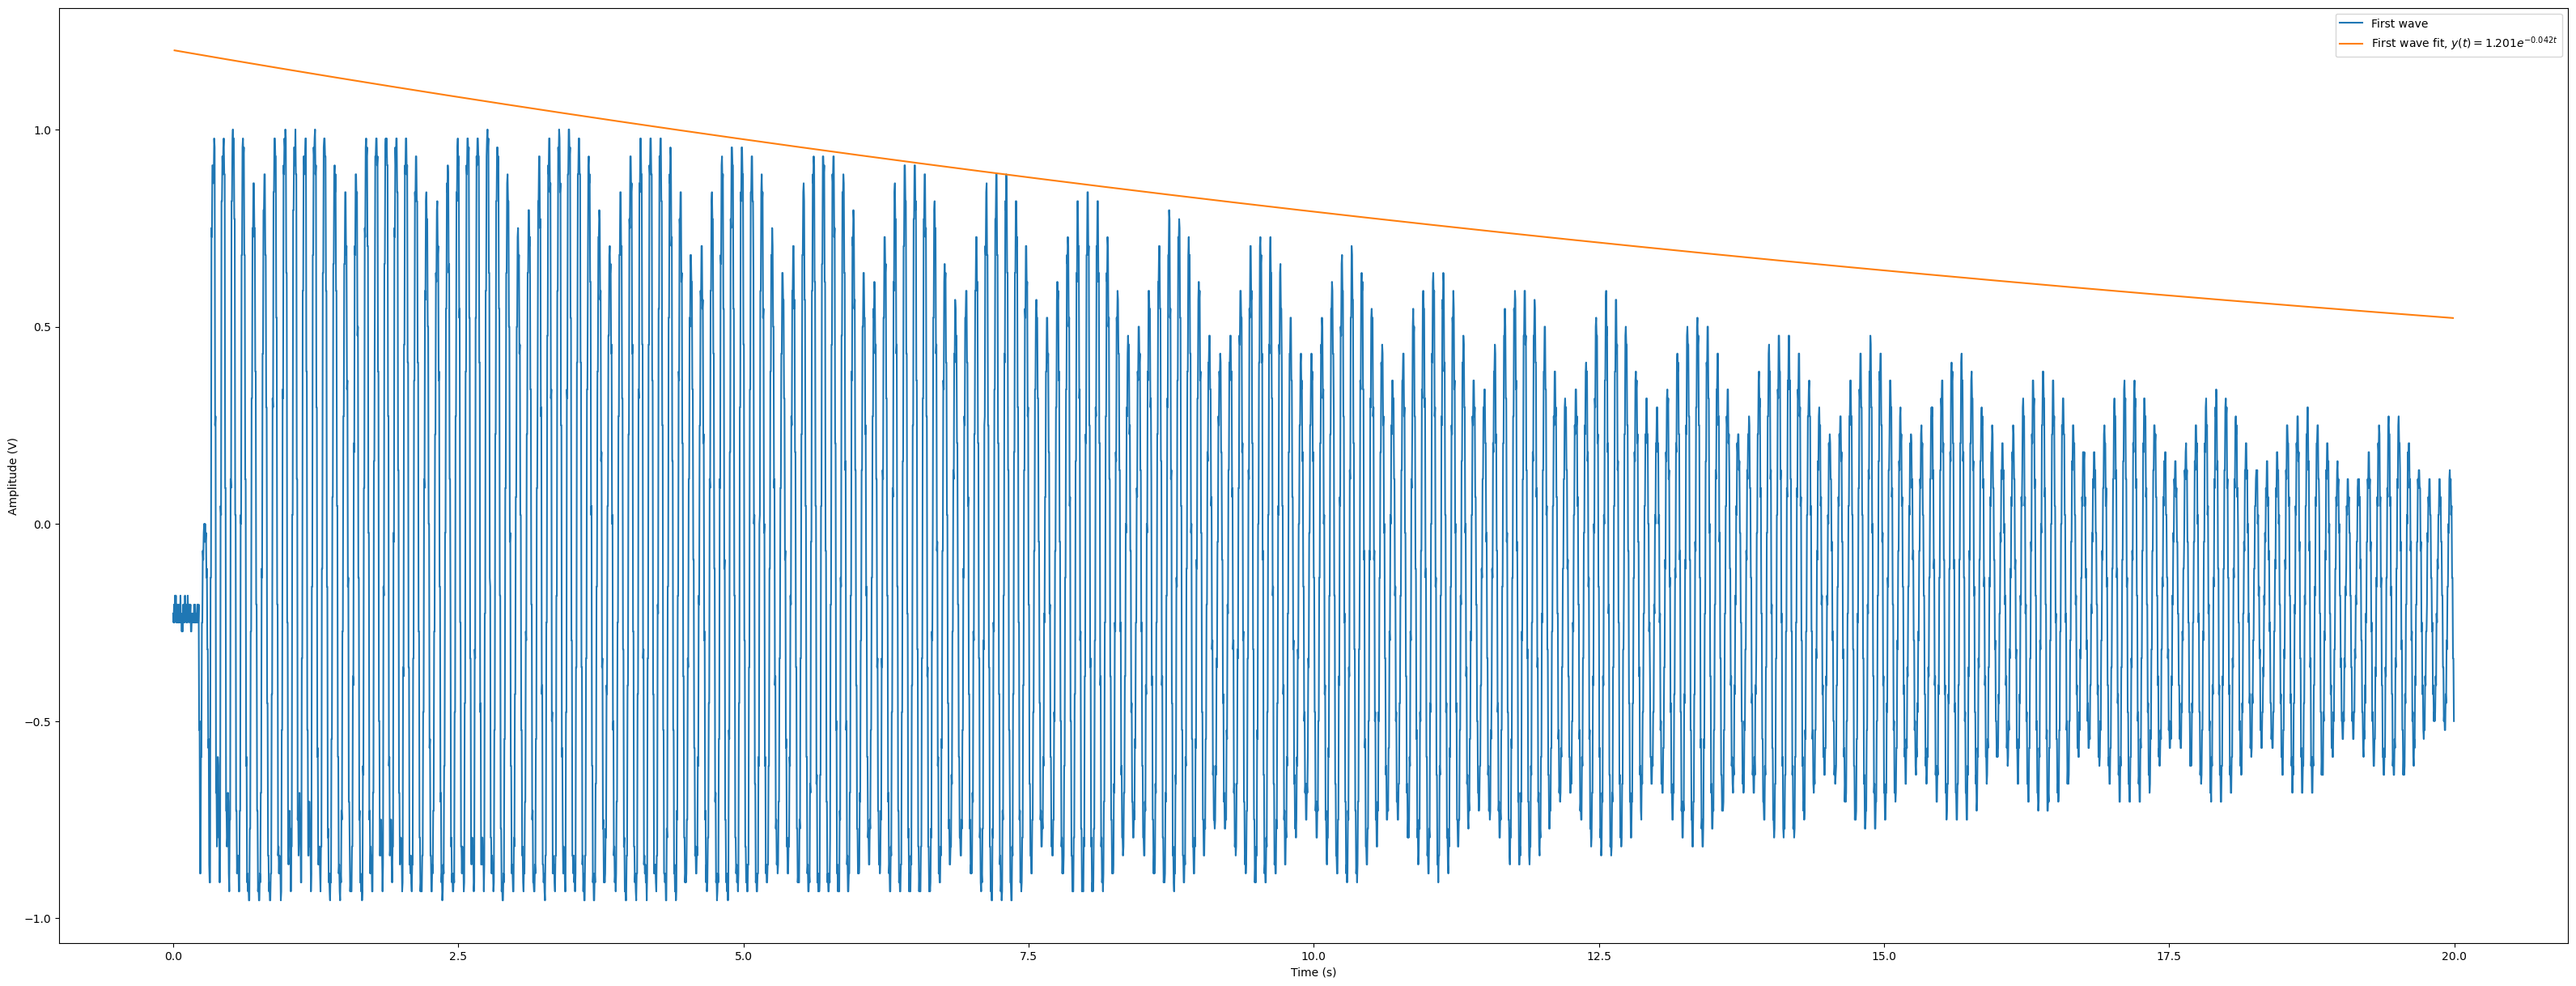

In [24]:
file1 = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/Damp/DLL0017.CSV'
data = np.loadtxt(file1, delimiter=',')
t1 = data[:, 0] # first wave
y1 = data[:, 1] # first wave
analytical_signal_1 = hilbert(y1)
envelope_1 = np.abs(analytical_signal_1)
peaks_1, _ = find_peaks(envelope_1)
t2 = data[:, 2] # second wave
y2 = data[:, 3] # second wave
analytical_signal_2 = hilbert(y2)
envelope_2 = np.abs(analytical_signal_2)
peaks_2, _ = find_peaks(envelope_2)

# Fit the peaks to an exponential decay
def exponential(t, A, delta):
    return A*np.exp(-t*delta)

popt1, pcov1 = curve_fit(exponential, t1[peaks_1], envelope_1[peaks_1])
popt2, pcov2 = curve_fit(exponential, t2[peaks_2], envelope_2[peaks_2])

print(popt1)

# Plotting the data with figure size
plt.figure(figsize=(40, 15))
plt.plot(t1, y1, label='First wave')
# plt.scatter(t2, y2, s=1, label='Second wave')
# plt.plot(t1[peaks_1], envelope_1[peaks_1], label='First wave envelope')
# plt.plot(t2[peaks_2], envelope_2[peaks_2], label='Second wave envelope')
plt.plot(t1[peaks_1], exponential(t1[peaks_1], *popt1), label='First wave fit, $y(t) =' + f'{popt1[0]:.3f}' + f'e^{{-{popt1[1]:.3f}t}}$')
# plt.plot(t2[peaks_2], exponential(t2[peaks_2], *popt2), label='Second wave fit')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.savefig(f'{file1[-6:-4]}_1.png', dpi=400)
plt.show()


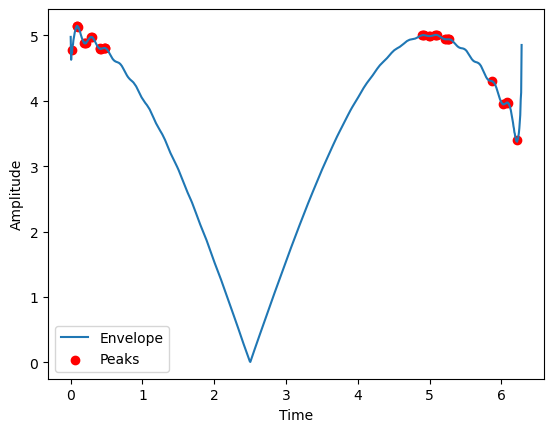

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, hilbert

# Parameters for the standing wave
amplitude = 1
wavelength = 10
frequency = 1 / wavelength
phase = np.pi / 2

# Parameters for the carrier wave
carrier_amplitude = 5
carrier_frequency = 5

# Time axis
t = np.linspace(0, 2 * np.pi, 1000)

# Standing wave
standing_wave = amplitude * np.sin(2 * np.pi * frequency * t + phase)

# Carrier wave
carrier_wave = carrier_amplitude * np.sin(2 * np.pi * carrier_frequency * t)

# Modulated signal
modulated_signal = standing_wave * carrier_wave

# Envelope detection
analytic_signal = hilbert(modulated_signal)
envelope = np.abs(analytic_signal)

# Find peaks
peaks, _ = find_peaks(envelope)

# Plotting
# plt.plot(t, modulated_signal, label='Modulated Signal')
plt.plot(t, envelope, label='Envelope')
plt.scatter(t[peaks], envelope[peaks], color='r', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



